# Assignment 1
The assignment is accompanied by a setup notebook that contains boilerplate code for each exercise. Some of the answers depend on a particular dataset split or seed, so consult the boilerplate code for specifics even if you would like to program everything from scratch.

## Software Libraries

For this assignment, we strongly encourage you to use NumPy for your implementations. While scikit-learn provides convenient implementations of many algorithms, we recommend implementing the core algorithms from scratch using NumPy for several important reasons:

**Educational Value**: Implementing algorithms from scratch deepens your understanding of the underlying mathematics and computational principles. You'll gain insight into the inner workings that you might miss when using high-level libraries.

**Control and Transparency**: NumPy gives you precise control over your implementations without the hidden complexity that can exist in scikit-learn's optimized code. This transparency is crucial for debugging and understanding exactly what your code is doing.

**Avoiding Implementation Pitfalls**: If you do choose to use scikit-learn, please be extremely careful. The library contains many implementation details, optimizations, and default parameters that can significantly affect your results. These details are not always obvious from the documentation and can lead to incorrect conclusions if not properly understood.

If you decide to use scikit-learn despite this recommendation, please thoroughly read the documentation and understand all parameters and their effects.

## A Note On Using Language Models
As a student in the age of AI, you have without a doubt used language models to study course material, answer questions or even solve assignments for you. Using other sources than the course material to learn is valuable indeed, but a word of caution:

The point of these exercises is for you to develop as an engineer and as a scientist. Using language models to directly answer the question might get you through the assignment, but it is liable to damage your development in the long run. In the end **someone needs to understand what the model is talking about in order to validate the outcomes.**

It is quite likely you will not end up designing gradient descent algorithms for a living. But do not confuse the specifics of this problem set with the broader educational value of **solving a difficult problem yourself from start to finish**.

Education is about more than gaining skills. It is also about a work ethic, a way of approaching problems, scientific rigor, managing your thought process, using the tools at your disposal and recognizing where your strengths and weaknesses lie. Using language models heedlessly runs the risk of depriving you of the opportunity to struggle through that process.

We can only ask you to adopt more responsibility for your education yourself. Consider not denying yourself the challenge and pressure necessary for growth, and instead use the tools you have to deepen your understanding. In the end, the responsibility is yours.

# 1. Linear Algebra for Datamining and Machine Learning

This assignment focuses on linear algebra concepts essential for understanding 
Principal Component Analysis (PCA), covariance analysis, and feature transformations.

Let $X \in \mathbb{R}^{m\times p}$ be a centered data matrix where each row 
represents an observation and each column represents a feature. The centering 
condition means each column has zero mean: $\sum_{i=1}^m X_{i,j} = 0$ for all $j$.

## 1a. Eigenvalues and Total Variance
Given the eigendecomposition of the sample covariance matrix
$$
C = \frac{1}{m-1} X^\top X = Q \Lambda Q^\top
$$
where $Q$ contains the eigenvectors and $\Lambda$ is diagonal with eigenvalues 
$\lambda_1, \lambda_2, \ldots, \lambda_p$, the total variance in the dataset equals:
$$
\text{Total Sample Variance} = \operatorname{tr}(C) = \frac{1}{m-1}\operatorname{tr}(X^\top X) = \lambda_{max}
$$

○ False

## 1b. Covariance for Centered Data
For a centered data matrix $ X $, the sample covariance between features $ j $ and $ k $ can be computed as:

$$
\operatorname{Cov}(j,k) = \frac{1}{m-1} \, X_{(:,j)}^\top X_{(:,k)}
$$

where $ X_{(:,j)} $ denotes the $ j $-th column of $ X $.

○ True

## 1c. Covariance Under Linear Transformations

If we apply a linear transformation

$$
Y = X W
$$

where $ W \in \mathbb{R}^{p\times q} $ is a transformation matrix, then the covariance matrix of the transformed features is:

$$
C_Y = W^\top C_X W
$$

where

$$
C_X = \frac{X^\top X}{m-1}
$$

is the covariance matrix of $ X $.

○ True

## 1d. Matrix Norms and Trace Properties
For any matrix $ A \in \mathbb{R}^{n\times d} $, the following relationship holds between row-wise and column-wise squared norms:

$$
\operatorname{tr}(A A^\top) = \sum_{i=1}^n \|A_{(i,:)}\|^2 = \sum_{j=1}^d \|A_{(:,j)}\|^2
$$

○ True


# 2. Data Normalization

In this exercise, you'll implement and explore different data normalization techniques, fundamental preprocessing steps in machine learning and data analysis. Raw data often comes with features on vastly different scales. Imagine comparing house prices in dollars with number of bedrooms, or pixel intensities (0-255) with age in years. Without proper scaling, algorithms can be biased toward features with larger numerical ranges, leading to poor performance.

Data normalization addresses this by transforming features to comparable scales while preserving the underlying relationships in the data. Different scaling methods make different assumptions about the data distribution and have varying robustness to outliers:

- **Min-Max Scaling** transforms features to a fixed range (typically [0,1]), preserving the original distribution shape but being sensitive to outliers
- **Standardization (Z-score)** centers data around zero with unit variance, assuming normally distributed data
- **Robust Scaling** uses median and interquartile range, making it less sensitive to extreme values

We will work with a small product sales dataset that contains information about five products.
Each row corresponds to a product (ID 0–4), and each column is a feature:

- *F1*: UnitsSold → Number of units sold
- *F2*: Revenue → Total revenue generated (in euros)
- *F3*: Returns → Number of returned items

The dataset is given by:
```
ID  F1   F2     F3
0   50   2000   5 
1   70   2500   7 
2   65   2100   6 
3   500  20000  40
4   60   2200   5 
```

This dataset is deliberately chosen because the scales are very different:
- UnitsSold ranges from 50 to 500 (with an outlier at 500).
- Revenue ranges from 2000 to 20000, much larger values than the others.
- Returns are small numbers (5–40).

You will implement and apply different scaling strategies to understand how each transformation affects the data distribution and individual values.

You are asked to:

- Implement a function that applies **min-max scaling** to transform features to the range [0,1]:
  ```python
  def minmax_scale(data: list) -> list:
  ```
  using the transformation:
  $$
  x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}
  $$

- Implement a function that applies **standardization** (z-score normalization):
  ```python
  def standardize(data: list) -> list:
  ```
  using the transformation:
  $$
  x_{standardized} = \frac{x - \mu}{\sigma}
  $$
  where $\mu$ is the mean and $\sigma$ is the standard deviation.

- Implement a function that applies **robust scaling**:
  ```python
  def robust_scale(data: list) -> list:
  ```
  using the transformation:
  $$
  x_{robust} = \frac{x - \text{median}(x)}{\text{IQR}(x)}
  $$
  where IQR is the interquartile range (Q3 - Q1).

**All final values should be rounded to two decimal places.**

For each scaling method, you should:
- Apply the transformation to the specified feature column
- Report the transformed values
- Analyze how the scaling affects the data distribution

## 2a. Min-Max Scaling

Apply min-max scaling to feature **F1** and report the complete transformed column:

**Processed values for F1 with min-max scaling:**
$$
F1_{minmax} = [0, 0.04, 0.03, 1, 0.02]
$$

## 2b. Standardization

Apply standardization to feature **F2** and report the specific transformed value for ID 4:

**Processed value for ID 4's F2 after standardization:**
$$
F2_{standardized}[ID=4] = -0.5
$$

## 2c. Robust Scaling

Apply robust scaling to feature **F3** and report the specific transformed value for ID 3:

**Processed value for ID 3's F3 after robust scaling:**
$$
F3_{robust}[ID=3] = 17.0
$$

In [1]:
import numpy as np

dataset = np.array([
    [50,   2000,  5],    # ID 0
    [70,   2500,  7],    # ID 1
    [65,   2100,  6],    # ID 2
    [500, 20000, 40],    # ID 3
    [60,   2200,  5],    # ID 4
])

# Feature names for reference
feature_names = ['F1', 'F2', 'F3']
print(f"Dataset shape: {dataset.shape}")
print(f"Features: {feature_names}")
print(f"Dataset:\n{dataset}")

def minmax_scale(data: np.ndarray) -> np.ndarray:
    """
    Apply min-max scaling to transform features to range [0,1].

    Args:
        data (np.ndarray): Input column/array to scale

    Returns:
        np.ndarray: Scaled data
    """
    # Your code here
    f1_list = np.array([row[0] for row in data])
    minmax_data = (f1_list - np.min(f1_list)) / (np.max(f1_list) - np.min(f1_list))
    return np.round(minmax_data, decimals=2)

def standardize(data: np.ndarray) -> np.ndarray:
    """
    Apply standardization (z-score normalization).

    Args:
        data (np.ndarray): Input column/array to standardize

    Returns:
        np.ndarray: Standardized data
    """
    # Your code here
    f2_list = np.array([row[1] for row in data])
    mean = np.mean(f2_list)
    std_dev = np.std(f2_list)
    standardized_data = (f2_list - mean) / std_dev
    return np.round(standardized_data, decimals=2)

def robust_scale(data: np.ndarray) -> np.ndarray:
    """
    Apply robust scaling using median and interquartile range.

    Args:
        data (np.ndarray): Input column/array to scale

    Returns:
        np.ndarray: Robust scaled data
    """
    # Your code here
    f3_list = list()
    for i in data.tolist():
        f3_list.append(i[2])
    q1 = np.percentile(f3_list, 25)
    q3 = np.percentile(f3_list, 75)
    iqr = q3 - q1
    robust_data = (f3_list - np.median(f3_list)) / iqr
    return np.round(robust_data, decimals=2)


print(f'F1 (minmax) = {minmax_scale(dataset)}')
print(f'F2 (standardized) (ID=4) = {standardize(dataset)[4]}')
print(f'F3 (robust) (ID=3) = {robust_scale(dataset)[3]}')

Dataset shape: (5, 3)
Features: ['F1', 'F2', 'F3']
Dataset:
[[   50  2000     5]
 [   70  2500     7]
 [   65  2100     6]
 [  500 20000    40]
 [   60  2200     5]]
F1 (minmax) = [0.   0.04 0.03 1.   0.02]
F2 (standardized) (ID=4) = -0.5
F3 (robust) (ID=3) = 17.0


# 3. Gradient Descent

In this exercise, you'll implement and explore gradient descent, a cornerstone of modern optimization. The method is simple in idea but powerful in application: we iteratively update our variables in the direction that most rapidly decreases the function, based on the **negative gradient**. While coordinate descent updates one variable at a time, gradient descent moves in the direction of steepest descent across all coordinates simultaneously. This often leads to:

- Faster convergence when variables are tightly coupled or when the function isn’t naturally separable,
- More direct progress toward a minimum, especially in smooth, well-behaved functions,
- Better behavior in high-dimensional settings where dependencies across variables are strong.

You will be exploring the concept by taking a look at minimizing **Himmelblau’s function**, a classical example in optimization with multiple local minima. It is often used to study the behavior of optimization algorithms such as gradient descent in non-convex settings.

The function is given by
$$
f(u, v) = (u^2 + v - 11)^2 + (u + v^2 - 7)^2
$$
where $u, v \in \mathbb{R}$.

You will use the **gradient descent** algorithm to find a minimum of $f$. Specifically, you will investigate how different **step-size strategies** and **initial points** affect convergence.

You are asked to:

- Implement a function that takes a point $(u, v)$ and returns the gradient $\nabla f(u, v)$ at that point.
- Implement a function
  ```python
  def gradient_descent(f, grad_f, eta, u0, v0, max_iter=100) -> tuple[list, list]:
  ```
  that performs the update rule:
  $$
  x_{t+1} \leftarrow x_t - \eta(t) \nabla f(x_t)
  $$
  where input $x_t$ is given by `x_t = (u_t, v_t)` and `eta(t)` defines the python method that returns the step size at iteration $t$. It is useful to make it return both the path and the computed values at each step.
- Using this setup, run 100 steps of gradient descent starting at $(u_0, v_0) = (4, -5)$ and evaluate different step-size strategies.
- Evaluate different starting points.

For each of the following strategies, report:

- The final function value:
  $$
  f(u_{100}, v_{100}) =
  $$
- The best (lowest) value reached during training:
  $$
  \min_{1 \leq t \leq 100} f(u_t, v_t) =
  $$

## 3a. Constant Step Size

Implement a constant step-size strategy $\eta=c$:
```python
def eta_const(t,c=1e-3) -> float:
```

## 3b. Decreasing Step Size (Inverse Square Root)

Implement a decreasing step size $\eta=c/\sqrt{t+1}$.
```python
def eta_sqrt(t,c=1e-3) -> float:
```

## 3c. Multi-Step Schedule

Implement a **piecewise-decaying step size** that drops by a factor `c` at predefined milestones:

$$\begin{aligned} \mathrm{eta\_multistep(t, [20,50], c=0.1, eta\_init=1)} = \begin{cases} 1, & t<20\\ 0.1 & 20\leq t<50\\ 0.01 & 50\leq t \end{cases} \end{aligned}$$

Implemented with the following interface:

```python
def eta_multistep(t, milestones=[20, 50], c=1e-4, eta_init=1e-3) -> float:
```

## 3d. Initialization

Repeat the above experiments (e.g., using `eta_const`) with different starting points $(u_0, v_0)$:

- $(-4, 0)$
- $(0, 0)$
- $(4, 0)$
- $(0, 4)$
- $(5, 5)$

For each initialization:

- Report the final point $(u_{100}, v_{100})$
- Report the final function value
- Optional (not graded): Plot the gradient descent trajectories of the different starting points.


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [3]:
def f(x: tuple) -> float:
    '''Returns a value of Himmelblau function at the given point.
    :param : is a tuple representing a point (u,v).
    :return: a function value.
    '''
    u, v = x
    function_value = (u ** 2 + v - 11) ** 2 + (u + v ** 2 - 7) ** 2
    return function_value
    

def f_gradient(x: tuple) -> tuple:
    '''Returns a gradient of Himmelblau function at the input point of a function.
    :param : is a tuple representing a point at which the gradient is calculated.
    :return: a tuple of gradient coordinates.
    '''
    u, v = x
    u_coordinate = 4 * (u ** 2 + v - 11) * u + 2 * (u + v ** 2 - 7)
    v_coordinate = 2 * (u ** 2 + v - 11) + 4 * (u + v ** 2 - 7) * v
    return u_coordinate, v_coordinate


def gradient_descent(f,grad_f,eta,u0,v0,max_iter=100):
    '''
    Finds a minimum of the function using a gradient-descent algorithm.
    :param f: a function, takes a tuple with a point (u,v) as input. 
              Returns a function value in a given point.
    "param grad_f: a function calculating the functiobn gradient coordinates.
                   Takes a point (u,v) as an input. Returns a tuple of coordinates (du, dv).
    :param eta: a step-size function. Takes an iteration number and a constant of step as input.
                Returns a step.
    :param u0: initial u coordinate.
    :param v0: initial v coordinate.
    :param max_iter: the number of maximum iteration.
    :return: a tuple. The first element of the returning tuple is a tuple of lists where the first list contains 
             the coordinates of u, and the second list contains the coordinates of v. The second element of the returning
             tuple is a list of function values in each point.
    '''
    u, v = u0, v0
    u_path, v_path = [u], [v]
    f_values = [f((u,v,))]  

    for t in range(1, max_iter+1):
        u_grad, v_grad = f_gradient((u, v,)) 
        u -= eta(t) * u_grad 
        v -= eta(t) * v_grad

        u_path.append(u)
        v_path.append(v)
        f_values.append(f((u, v)))

    return (u_path, v_path), f_values
        

def eta_const(t,c=1e-3):
    '''
    Returns a size of step for gradient descent algorithm.
    :param t: is an iteration number.
    "param c: is a size of a step.
    :return: a size of a step on the t-th iteration.
    '''
    return c


def eta_sqrt(t,c=1e-3):
    '''
    Returns a size of step for gradient descent algorithm.
    :param t: is an iteration number.
    "param c: is a size of a step.
    :return: a size of a step on the t-th iteration.
    '''
    return c / (t + 1) ** 0.5


def eta_multistep(t,milestones=[20,50],c=1e-4,eta_init=1e-3):
    '''
    Returns a size of step for gradient descent algorithm.
    :param t: is an iteration number.
    "param c: is a size of a step.
    :return: a size of a step on the t-th iteration.
    '''
    if t < milestones[0]:
        return eta_init
    elif milestones[0] <= t < milestones[1]:
        return c * eta_init
    elif t >= milestones[1]:
        return (c ** 2) * eta_init
    

### Task 3a. Constant Step Size

In [4]:
eta_const_strategy = gradient_descent(f,f_gradient,eta_const,4,-5)
final_function_value_eta_const = eta_const_strategy[1][-1]
best_value_eta_const = min(eta_const_strategy[1][:])

print(f'Constant eta strategy: f_value = {final_function_value_eta_const}, minimum of f_values = {best_value_eta_const}.')

Constant eta strategy: f_value = 0.028936222243675813, minimum of f_values = 0.028936222243675813.


### Task 3b. Decreasing Step Size

In [5]:
eta_root_strategy = gradient_descent(f,f_gradient,eta_sqrt,4,-5)
final_function_value_eta_root = eta_root_strategy[1][-1]
best_value_eta_root = min(eta_root_strategy[1][:])

print(f'Square root eta strategy: f_value = {final_function_value_eta_root}, minimum of f_values = {best_value_eta_root}.')

Square root eta strategy: f_value = 14.481427564356759, minimum of f_values = 14.481427564356759.


### Task 3c. Multi-step Schedule

In [6]:
eta_multistep_strategy = gradient_descent(f,f_gradient,eta_multistep,4,-5)
final_function_value_eta_multistep = eta_multistep_strategy[1][-1]
best_value_eta_multistep = min(eta_multistep_strategy[1][:])

print(f'Multi-step eta strategy: f_value = {final_function_value_eta_multistep}, minimum of f_values = {best_value_eta_multistep}.')

Multi-step eta strategy: f_value = 11.190223188008511, minimum of f_values = 11.190223188008511.


### Task 3d. Initialization

Initial point = (-4, 0).Final point = (-3.1527685060505615,-0.7245791160351784).Final function value = 95.87854333645393.
Initial point = (0, 0).Final point = (2.908593470343879,2.0930548520121914).Final function value = 0.2836291681954541.
Initial point = (4, 0).Final point = (3.450356945147482,-0.4816757965260163).Final function value = 11.185850747696733.
Initial point = (0, 4).Final point = (-2.367112070588055,3.0999950650305585).Final function value = 5.334202766920818.
Initial point = (5, 5).Final point = (2.9822282470041976,2.0413763094200457).Final function value = 0.026550944921419198.
Initial point = (4, -5).Final point = (3.588470423627356,-1.8923408107550113).Final function value = 0.028936222243675813.


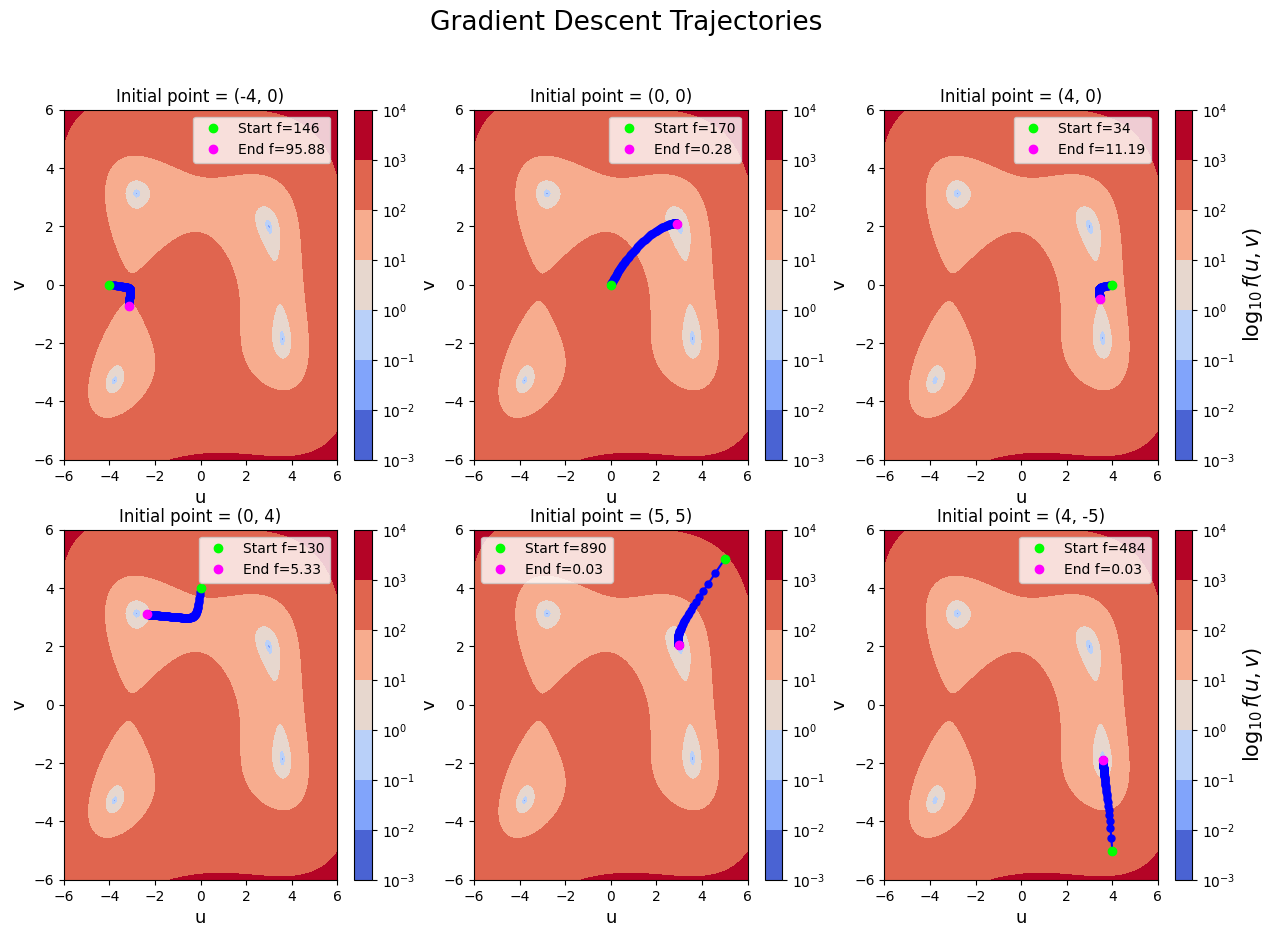

In [7]:
initial_points = [(-4,0), (0,0), (4,0), (0,4), (5,5), (4,-5)]

fig, ax = plt.subplots(2,3, figsize=(15,10))
ax = ax.flatten()

u = np.linspace(-6, 6, 500)
v = np.linspace(-6, 6, 500)
U, V = np.meshgrid(u, v)
Z = f((U, V))

for i, points in enumerate(initial_points):
    u_0, v_0 = points
    eta_constant_strategy_init, values = gradient_descent(f,f_gradient,eta_const,u_0,v_0)
    print(f'Initial point = ({u_0}, {v_0}).'
          f'Final point = ({eta_constant_strategy_init[0][-1]},{eta_constant_strategy_init[1][-1]}).'
          f'Final function value = {values[-1]}.')
    
    contour = ax[i].contourf(U, V, Z, levels=200, norm=mcolors.LogNorm(vmin=Z.min(), vmax=Z.max()), cmap='coolwarm')
    cbar = fig.colorbar(contour, ax=ax[i])
    if i == 2 or i == 5:
        cbar.set_label('$\\log_{10}{f(u,v)}$', fontsize=15)
    ax[i].plot(eta_constant_strategy_init[0], eta_constant_strategy_init[1], 'bo-', markersize=5) 
    ax[i].plot(eta_constant_strategy_init[0][0], eta_constant_strategy_init[1][0], 'o', color='lime', label=f"Start f={values[0]}")
    ax[i].plot(eta_constant_strategy_init[0][-1], eta_constant_strategy_init[1][-1], 'o', color='fuchsia', label=f"End f={round(values[-1],2)}")

    ax[i].set_xlabel('u', fontsize=13)
    ax[i].set_ylabel('v', fontsize=13)
    ax[i].set_title(f'Initial point = ({u_0}, {v_0})')
    ax[i].legend()
    
fig.suptitle("Gradient Descent Trajectories", fontsize=19);


# 4. Coordinate Descent

In optimization, we often aim to find the global minimum of a function by solving the gradient equation analytically. However, this becomes impractical in many real-world settings. Functions may be too complex, too high-dimensional, or lack closed-form solutions. This is where **coordinate descent** provides an alternative.

Coordinate descent updates one variable at a time, minimizing along each coordinate direction while holding the others fixed. This is particularly useful when:
- The function is differentiable but hard to minimize jointly,
- Partial updates are much easier to compute (analytically or numerically).

In this assignment, you'll apply coordinate descent to the following function:

$$
f(\mathbf{x}) = \exp(x_1 - 3x_2 + 3) + \exp(3x_2 - 2x_3 - 2) + \exp(2x_3 - x_1 + 2)
$$
with $x_1, x_2, x_3 \in \mathbb{R}$.

This function is fully differentiable, and its coordinate-wise argmins are analytically tractable. In part $a$, you’ll derive the updates for each coordinate individually. In part $b$, you’ll use these updates to implement a full coordinate descent loop, stepping through each coordinate iteratively and observing the convergence behavior.

## 4a. Analytically Computing Partial Gradients
Implement for each coordinate $ x_i $, $( i \in \{1,2,3\} )$ a function `argmin_xi(x)` that returns $\arg\min_{x_i} f(x)$, for each coordinate using the initial point $\mathbf{x}_{t_0} = (4, 3, 2) $:

- **$ \arg\min_{x_1} f({\mathbf{x}_{t_0}}) = 6.0 $**
- **$ \arg\min_{x_2} f({\mathbf{x}_{t_0}}) = 2.17 $**
- **$ \arg\min_{x_3} f({\mathbf{x}_{t_0}}) = 2.25 $**

## 4b. Implementing The Coordinate Descent Loop
Implement a function `coordinate_descent(f, argmin, x_t0, max_iter=25)` that performs `max_iter` coordinate descent steps, where:

- `f` is the function to be minimized.
- `argmin` is an array of the `argmin_xi` functions for each coordinate.
- `x_t0` is the starting point (initialization).

At iteration $ t $, update all coordinates in order:
$$
x_t[i] = \text{argmin}[i](x_t)
$$

Using the initial point $\mathbf{x}_{t_0} = (1, 20, 5)$, run your coordinate descent implementation and answer the following:

- What are the final three coordinates (i.e. after the final step $t_n$)?
    - **$ \arg\min_{x_1} f({\mathbf{x}_{t_n}}) = 26.67 $**
    - **$ \arg\min_{x_2} f({\mathbf{x}_{t_n}}) = 9.56 $**
    - **$ \arg\min_{x_3} f({\mathbf{x}_{t_n}}) = 12.83 $**
- What is the value the coordinate descent converges to?
  - $ f(\mathbf{x}_{t_n}) = 8.15 $
- Optional (not graded): Use visualizations to validate your answer. Hint: A partial check you can perform is to see if you ended up in a local mimimum across dimensions.

In [8]:
def argmin_x1(point):
    '''
    Returns a partial derivative by x_1 of the given function.
    :param point: a tuple with a point coordinates.
    :return: a value of a partial derivative by x_1.
    '''
    x_1, x_2, x_3 = point
    return x_3 + (3 / 2) * x_2 - 0.5


def argmin_x2(point):
    '''
    Returns a partial derivative by x_2 of the given function.
    :param point: a tuple with a point coordinates.
    :return: a value of a partial derivative by x_2.
    '''
    x_1, x_2, x_3 = point
    return (1 / 6) * x_1 + (1 / 3) * x_3 + (5 / 6)


def argmin_x3(point):
    '''
    Returns a partial derivative by x_3 of the given function.
    :param point: a tuple with a point coordinates.
    :return: a value of a partial derivative by x_3.
    '''
    x_1, x_2, x_3 = point
    return (1 / 4) * x_1 + (3 / 4) * x_2 - 1

init_point_a = (4,3,2)
minimum_x1 = argmin_x1(init_point_a)
minimum_x2 = argmin_x2(init_point_a)
minimum_x3 = argmin_x3(init_point_a)

print(f'argmin_x1 = {round(minimum_x1, 2)}, argmin_x2 = {round(minimum_x2, 2)}, argmin_x3 = {round(minimum_x3, 2)}')

argmin_x1 = 6.0, argmin_x2 = 2.17, argmin_x3 = 2.25


In [9]:
def f(point):
    '''
    Return a value of a function in the given point.
    :param point: a tuple with the given point coordinates.
    :return: a function value in the point.
    '''
    x_1, x_2, x_3 = point
    return np.exp(x_1 - 3 * x_2 + 3) + np.exp(3 * x_2 - 2 * x_3 - 2) + np.exp(2 * x_3 - x_1 + 2)


def coordinate_descent(f,argmin,x_t0,max_iter=25):
    '''
    Perform coordinate descent on function f.
    :param f: function to minimize
    :param argmin: list/array of argmin_xi functions
    :param x_t0: starting point (tuple)
    :param max_iter: number of iterations
    :return: (minimum_point, function_value)
    '''
    argmin_x1, argmin_x2, argmin_x3 = argmin
    x1, x2, x3 = x_t0
    for t in range(1, max_iter + 1):
        x1 = argmin_x1((x1,x2,x3))
        x2 = argmin_x2((x1,x2,x3))
        x3 = argmin_x3((x1,x2,x3))

    return (x1,x2,x3), f((x1,x2,x3))


init_point_b = (1, 20, 5)
argmin_array = np.array((argmin_x1, argmin_x2, argmin_x3))
minimum_point, minimum_value = coordinate_descent(f,argmin_array,init_point_b)

print(f'Minimum point is {tuple(round(i, 2) for i in minimum_point)}, minimum function value is {round(minimum_value, 2)}.')
print(f"argmin_x1 = {round(minimum_point[0], 2)}")
print(f"argmin_x2 = {round(minimum_point[1], 2)}")
print(f"argmin_x3 = {round(minimum_point[2], 2)}")
print(f"f(x_tn)   = {round(minimum_value, 2)}")


Minimum point is (26.67, 9.56, 12.83), minimum function value is 8.15.
argmin_x1 = 26.67
argmin_x2 = 9.56
argmin_x3 = 12.83
f(x_tn)   = 8.15


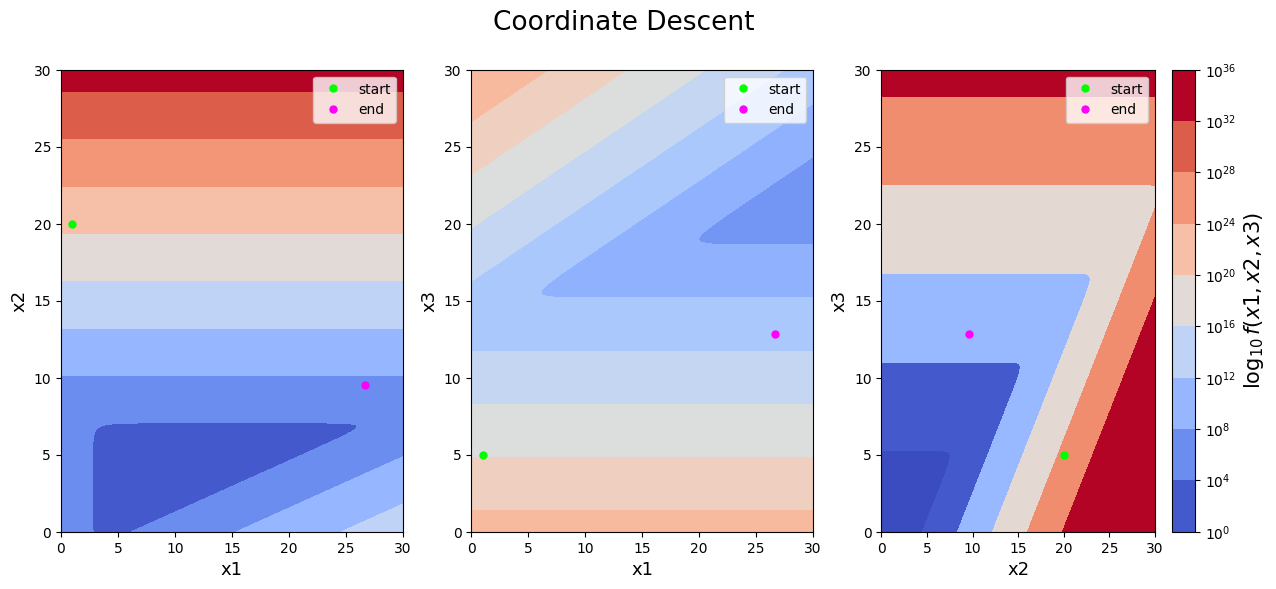

In [10]:
fig, ax = plt.subplots(1,3, figsize=(15,6))
ax = ax.flatten()

x_1 = np.linspace(0, 30, 200)
x_2 = np.linspace(0, 30, 200)
x_3 = np.linspace(0, 30, 200)
grid_size = len(x_1)
X_1_1,  X_2_1 = np.meshgrid(x_1, x_2)
X_2_2, X_3_2 = np.meshgrid(x_2, x_3)
X_1_3, X_3_3 = np.meshgrid(x_1, x_3)

projections = (
    (X_1_1, X_2_1, np.full(grid_size, init_point_b[-1])),
    (X_1_3, np.full(grid_size, init_point_b[-2]), X_3_3),
    (np.full(grid_size, init_point_b[0]), X_2_2, X_3_2)
)

function_1 = f(projections[0])
function_2 = f(projections[1])
function_3 = f(projections[2])

contour = ax[0].contourf(X_1_1, X_2_1, function_1, 100, norm=mcolors.LogNorm(vmin=function_1.min(), vmax=function_1.max()), cmap='coolwarm')
ax[0].plot(init_point_b[0], init_point_b[1], 'o', markersize=5, color='lime', label='start')
ax[0].plot(minimum_point[0], minimum_point[1], 'o', markersize=5, color='fuchsia', label='end')
ax[0].set_xlabel('x1', fontsize=13)
ax[0].set_ylabel('x2', fontsize=13)
ax[0].legend()

ax[1].contourf(X_1_3, X_3_3, function_2, 100, norm=mcolors.LogNorm(vmin=function_3.min(), vmax=function_3.max()), cmap='coolwarm')
ax[1].plot(init_point_b[0], init_point_b[-1], 'o', markersize=5, color='lime', label='start')
ax[1].plot(minimum_point[0], minimum_point[-1], 'o', markersize=5, color='fuchsia', label='end')
ax[1].set_xlabel('x1', fontsize=13)
ax[1].set_ylabel('x3', fontsize=13)
ax[1].legend()

ax[2].contourf(X_2_2, X_3_2, function_3, 100, norm=mcolors.LogNorm(vmin=function_2.min(), vmax=function_2.max()), cmap='coolwarm')
ax[2].plot(init_point_b[1], init_point_b[2], 'o', markersize=5, color='lime', label='start')
ax[2].plot(minimum_point[1], minimum_point[-1], 'o', markersize=5, color='fuchsia', label='end')
ax[2].set_xlabel('x2', fontsize=13)
ax[2].set_ylabel('x3', fontsize=13)
ax[2].legend()
cbar_2 = fig.colorbar(contour, ax=ax[2])
cbar_2.set_label('$\\log_{10}{f(x1,x2,x3)}$', fontsize=15)

fig.suptitle("Coordinate Descent", fontsize=19);



# 5. Bias and Variance
Consider the true regression function:
$$
f^*(x) = \sigma(x) = \frac{1}{1 + e^{-x}}
$$
 
You might recognize this as the *sigmoid function*. Suppose we fit three regression models to different independent and identically distributed (i.i.d.) datasets sampled from the true regression function, $\mathcal{D}_1, \mathcal{D}_2, \mathcal{D}_3$, resulting in the following models:
$$
\begin{aligned}
f_{\mathcal{D}_1}(x) &= 2x + 0.4 \\
f_{\mathcal{D}_2}(x) &= x + 0.1 \\
f_{\mathcal{D}_3}(x) &= 3x + 0.7
\end{aligned}
$$

For $ x_0 = 0 $, compute:
1. The sample mean of the predictions $ f_{\mathcal{D}_i}(x_0) $, $ i=1,2,3 $.
2. The bias of the average predictor relative to $ f^*(x_0) $.
3. The variance of the predictors at $ x_0 $.

Then provide $bias^2$ and $variance$:

$bias^2 = 0.009999999999999995 $

$variance = 0.06 $

In [44]:
import math

x_0 = 0

f_d1 = 2 * x_0 + 0.4
f_d2 = x_0 + 0.1
f_d3 = 3 * x_0 + 0.7

sample_mean = (f_d1 + f_d2 + f_d3) / 3

bias_2 = ((1 / (1 + math.exp(-x_0))) - sample_mean) ** 2
variance = ((sample_mean - f_d1) ** 2 + (sample_mean - f_d2) ** 2 + (sample_mean - f_d3) ** 2) / 3

print(f'bias^2: {bias_2}')
print(f'variance: {variance}')

bias^2: 0.009999999999999995
variance: 0.06


# 6. Polynomial Regression

In this exercise, you’ll explore regression, a technique that is used to predict continuous outputs, i.e. real numbers, based on multiple inputs. You will implement a full modeling pipeline from raw data to fitted models. The focus is on building an intuitive and practical understanding of how regression models behave as they grow in complexity.

You will use the California housing dataset. The accompanying Jupyter notebook includes instructions to load the data. Your task is to predict housing prices based on demographic and geographic features such as median income, housing age, and population density. You'll begin by exploring the dataset, which is crucial for any type of data based modeling, and then fit models with different types of tradeoffs.

## 6a. Exploring the Dataset

Before modeling, it's important to understand what kind of data you're working with. Even though you do not strictly need to do so to answer the question, consider using visualizations and summary statistics to explore relationships between variables and prices. Are any features clearly predictive? Are there outliers or skewed distributions? Consider how these factors might affect modeling later on. Building intuiting on the data you are modelling pretty much always pays off, especially when trying to identify and fix modelling problems and bugs.

Report the following:
- Number of samples in the dataset:
- Number of features in the dataset, excluding the target:

Optional task (not graded):
- Plot the relationship between the target (price) and the different features.

## 6b. Polynomial Feature Expansion

Linear regression can only capture straight-line relationships — but housing data often involves more complexity. To capture nonlinear patterns, you’ll expand the input features using a polynomial of various degrees, which includes squares and interaction terms between features. Use `PolynomialFeatures` from `sklearn.preprocessing` to construct this expanded design matrix.

However, polynomial features can lead to numerical instability, especially when the original features vary in scale. Large feature values produce large squared terms, which can cause issues during optimization. In practice, this results in warnings about ill-conditioned matrices. To avoid this, you’ll standardize the original data using `StandardScaler` before generating polynomial features.

Once the transformation is complete, report the shape of the polynomial design matrix, after expansion with a polynomial of degree 2:

**Do not include bias when constructing the features using PolynomialFeatures**.

These observations should help you develop intuition for the cost of model complexity.

## 6c. Fitting A Regression
With your polynomial design matrix in hand, you'll now compute the regression model that minimizes the residual sum of squares (RSS) and compare it to the performance of a linear model. 

**Use the data set split in the accompanying notebook to answer the following questions**. You will have a training and validation dataset. Only use the training dataset to fit the models.  

After solving for the regression parameters, report the following parameters for each of two models, and report the mean squared error (MSE) on the validation set:

Linear model:
- $ \beta_{\text{MedInc}} $
- $ \beta_{\text{AveBedrms}} $
- $ \beta_{\text{HouseAge}} $
- $MSE_{val} = $ 

Polynomial of degree 2:
- $ \beta_{\text{MedInc}} $
- $ \beta_{\text{MedInc} \cdot \text{AveBedrms}} $
- $ \beta_{\text{HouseAge} \cdot \text{AveBedrms}} $
- $MSE = $

Optional (not graded): Plot data sample of your trained models on top of the data to get a sense of the model fit for different target-feature combinations.

# 7. Regularization And Cross Validation

Building on your polynomial regression models from Exercise 6, you'll now explore two critical concepts in machine learning: regularization to prevent overfitting, and cross-validation to obtain more reliable performance estimates. These techniques address fundamental challenges that arise when working with complex models on real data.
In Exercise 6, you likely observed that the polynomial model achieved lower training error than the linear model, but this doesn't necessarily mean it will generalize better to new data. Exercise 7 introduces tools to address this challenge systematically.

## 7a. Regularization

To counter overfitting and improve stability, you’ll re-fit the models using **Ridge regression**, which penalizes large weights via an L2 penalty. The specific objective here is a _modified version_ of the standard ridge regression objective function, with $n$ indicating the number of data points used to fit the model:

$$
\min_{\beta} \frac{1}{n} \| y - X\beta \|^2 + \lambda \| \beta \|^2
$$

Implement ridge regression using the same linear and polynomial design matrix, and set $ \lambda = 0.001 $. As before, examine how the regularization changes the learned parameters and the mean squared error (MSE).

Report the same three coefficients:

Linear model:
- $ \beta_{\text{MedInc}} $
- $ \beta_{\text{AveBedrms}} $
- $ \beta_{\text{HouseAge}} $
- $MSE_{val} = $ 

Polynomial of degree 2:
- $ \beta_{\text{MedInc}} =$
- $ \beta_{\text{MedInc} \cdot \text{AveBedrms}} =$
- $ \beta_{\text{HouseAge} \cdot \text{AveBedrms}} =$
- $MSE_{val} = $

## 7b. Cross-Validation

Cross-validation provides a more robust estimate of model performance than a single train-validation split, at the cost of significantly more computation. By systematically training and evaluating on different subsets of the data, you can better understand how well your models generalize and reduce the risk of making decisions based on a particular "lucky" or "unlucky" split.

**Use the 5-fold cross-validation splits provided in the setup notebook to answer the following question.** For each fold, you'll train your models on four folds and evaluate on the fifth, repeating this process for all five folds. This gives you five performance estimates that you can aggregate to get a more reliable assessment of model quality.

You'll evaluate both the linear model and the polynomial degree 2 model using the same Ridge regression approach from 7a. Remember to apply the same preprocessing pipeline within each fold: standardize the training folds, apply polynomial expansion if needed, then fit the ridge regression model.

**Important**: Each fold should be treated as an independent experiment. This means you should standardize features using only the training folds for that iteration, not the entire dataset. This prevents data leakage and ensures your cross-validation estimates are unbiased.

After completing cross-validation, also evaluate both models on the held-out validation set (`X_val`, `y_val`) to assess final performance on truly unseen data.

Report the following metrics:

**Linear model (Ridge):**
- Mean Cross-Validation MSE = 
- Standard deviation of Cross-Validation MSE = 
- Final validation MSE = 

**Polynomial degree 2 model (Ridge):**
- Mean Cross-Validation MSE = 
- Standard deviation of Cross-Validation MSE = 
- Final validation MSE = 

**Optional task (not graded):** How do the cross-validation estimates compare to the final validation performance? What does this tell you about the reliability of your model selection process? How do the measures compare to a single train-test split? Did regularization help performance?

# 8. California Housing Dataset

This open question will test your understanding of the entire modeling process. Use the California housing dataset (see the setup notebook).

## 8a. Feature Selection

What are the candidate features of this dataset that could be removed according to variance thresholding or correlation-based feature selection? Explain how you derive the candidates by means of plots or tables and choose at least three features that are candidates for removal.

## 8b. Cross Validation

Implement a function that returns the regression model for a given design matrix and target vector. Fit and evaluate four regression models (with affine basis functions) using (I) all features and (II-IV) all but one of the three candidate features from the previous part. Use 5-fold cross-validation to evaluate your regression models. Add a table in the report with the cross-validated scores for each of your regression models.

## 8c. Interpretation

Interpret your results. Would you recommend removing one of the candidate features? What would you infer from the cross-validated scores?

Justify your analysis and discuss possible benefits and drawbacks when removing one of the features vs. keeping all features.